In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [2]:
pf = pd.read_csv("pseudo_facebook.tsv", sep='\t')

In [3]:
pf.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


### Scatterplots

Looks like some users lie about their age (60+, 100+) - most probably those are teenagers:

[(13, 90)]

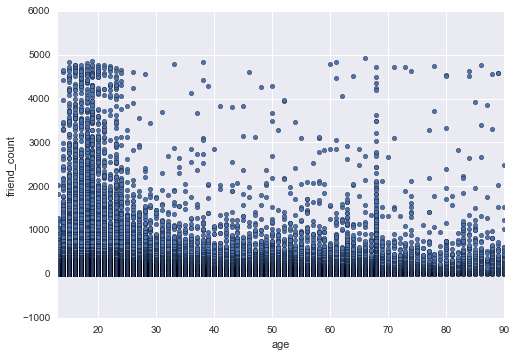

In [4]:
pf.plot(kind='scatter', x='age', y='friend_count').set(xlim = (13,90))

To reduce overplotting:

In [5]:
pf['friend_count_sqrt'] = np.sqrt(pf['friend_count'])

[(0, 100), (13, 90)]

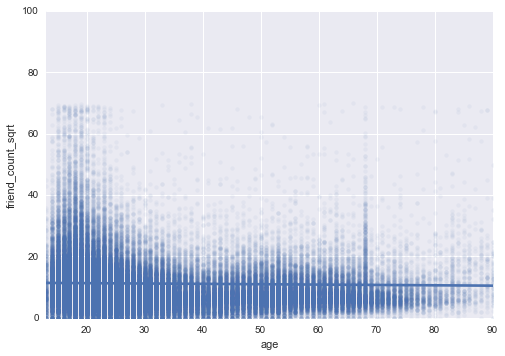

In [6]:
ax = sns.regplot(x='age', y='friend_count_sqrt', data=pf, scatter_kws={'alpha':0.05})
#ax.set_yscale('log')
ax.set(xlim = (13,90), ylim = (0, 100))

[(0, 4000), (13, 90)]

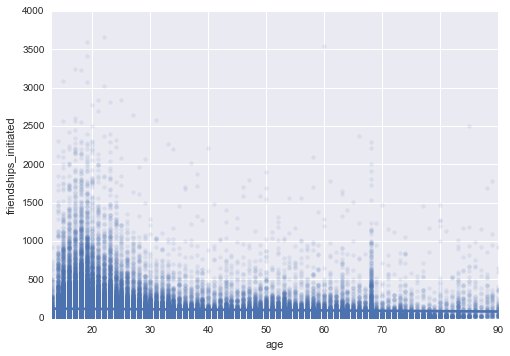

In [7]:
ax = sns.regplot(x='age', y='friendships_initiated', data=pf, scatter_kws={'alpha':0.1})
ax.set(xlim = (13,90), ylim = (0, 4000))

### Conditional means

In [45]:
d = {'mean':'mean',
     'median':'median',
     'q10': lambda x:x.quantile(0.1),
     'q90': lambda x:x.quantile(0.9),
     'n': 'size'}
pf_by_age = pf.groupby(['age'])['friend_count'].agg(d).reset_index()
pf_by_age.head()

,age,q90,n,median,q10,mean
0,13,412.7,484,74.0,3.0,164.750000
1,14,569.6,1925,132.0,12.4,251.390130
2,15,811.6,2618,161.0,16.0,347.692131
3,16,817.0,3086,171.5,18.0,351.937135
4,17,808.6,3283,156.0,18.0,350.300640


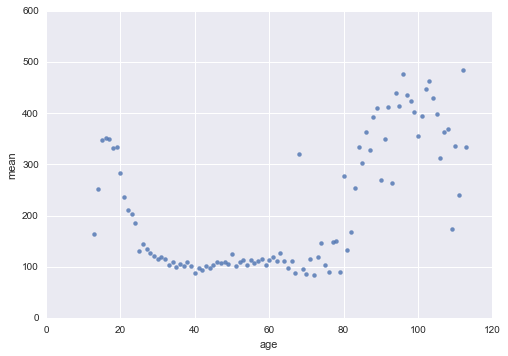

In [59]:
ax = sns.regplot(x='age', y='mean', data=pf_by_age, fit_reg=False)

### Overlaying summaries

[(0, 500), (13, 90)]

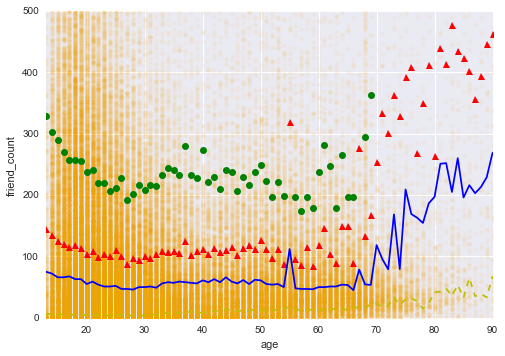

In [67]:
ax = sns.regplot(x='age', y='friend_count', data=pf, fit_reg=False, scatter_kws={'alpha':0.05}, color='orange')
plt.plot(pf_by_age['mean'], 'r^')
plt.plot(pf_by_age['median'], 'b-')
plt.plot(pf_by_age['q10'], 'y--')
plt.plot(pf_by_age['q90'], 'go')
ax.set(xlim = (13,90), ylim = (0, 500))

About 90% of users of age between 35-60 have less friends then 250 (green)

In [65]:
pf.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,friend_count_sqrt
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,0.0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,0.0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,0.0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,0.0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,0.0


### Correlation

In [76]:
sub.corr()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,friend_count_sqrt
userid,1.000000,-0.008377,0.000380,0.008377,0.003959,-0.002347,-0.000879,-0.001076,-0.002971,0.001983,-0.004419,0.001761,0.000940,0.002129,0.001962
age,-0.008377,1.000000,0.048724,-1.000000,0.035713,0.371634,-0.171724,-0.190516,-0.014174,-0.028720,-0.027510,-0.031928,0.014553,-0.021819,-0.214202
dob_day,0.000380,0.048724,1.000000,-0.048724,0.128032,0.048013,0.024424,0.023491,0.015552,0.000556,0.013751,-0.000379,0.009776,0.001823,0.040334
dob_year,0.008377,-1.000000,-0.048724,1.000000,-0.035713,-0.371634,0.171724,0.190516,0.014174,0.028720,0.027510,0.031928,-0.014553,0.021819,0.214202
dob_month,0.003959,0.035713,0.128032,-0.035713,1.000000,0.037117,0.021231,0.021754,0.013488,0.006119,0.010152,0.006325,0.011259,0.005320,0.035786
tenure,-0.002347,0.371634,0.048013,-0.371634,0.037117,1.000000,0.148191,0.121919,0.069202,0.033933,0.039906,0.029859,0.076844,0.036826,0.211400
friend_count,-0.000879,-0.171724,0.024424,0.171724,0.021231,0.148191,1.000000,0.832921,0.313341,0.243759,0.248299,0.240105,0.242029,0.228562,0.901791
friendships_initiated,-0.001076,-0.190516,0.023491,0.190516,0.021754,0.121919,0.832921,1.000000,0.293743,0.178428,0.236319,0.176853,0.221329,0.165760,0.839563
likes,-0.002971,-0.014174,0.015552,0.014174,0.013488,0.069202,0.313341,0.293743,1.000000,0.325008,0.873216,0.324357,0.645843,0.298819,0.324514
likes_received,0.001983,-0.028720,0.000556,0.028720,0.006119,0.033933,0.243759,0.178428,0.325008,1.000000,0.253791,0.975491,0.256920,0.951032,0.208273


In [69]:
print pf['age'].corr(pf['friend_count'])

-0.0274073715423


In [73]:
sub = pf[pf['age']<=70]
print sub['age'].corr(sub['friend_count'])

-0.171724482702


In [75]:
sub = pf[pf['age']<=70]
print sub['age'].corr(sub['friend_count'], method='spearman')

-0.255293395493


In [86]:
sub = pf#[pf['age']<=70]
print sub['www_likes_received'].corr(sub['likes_received'])

0.947990180346


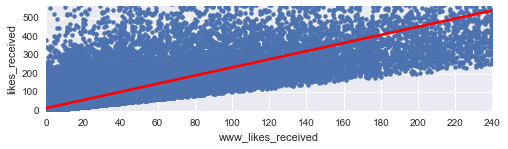

In [108]:
ax = sns.regplot(x='www_likes_received', y='likes_received', data=pf,
                 fit_reg=True, ci=None, 
                 line_kws={'color':'red'}, scatter_kws={'alpha':1})
res = ax.set(xlim = (0, pf['www_likes_received'].quantile(0.95)), ylim = (0, pf['likes_received'].quantile(0.95)))
res = ax.set(xticks = range(0, 250, 20), aspect=0.1)

**Note**:  scaling axes helps better see shapes

### Noise

In [123]:
pf['age_with_months'] = pf['age'] + (12 - pf['dob_month'])/ 12
d = {'mean':'mean',
     'median':'median',
     'q10': lambda x:x.quantile(0.1),
     'q90': lambda x:x.quantile(0.9),
     'n': 'size'}
pf_by_age_with_month = pf.groupby(['age_with_months'])['friend_count'].agg(d).reset_index()
pf_by_age_with_month.head()

,age_with_months,q90,n,median,q10,mean
0,13.166667,107.5,6,30.5,1.0,46.333333
1,13.250000,268.4,14,23.5,0.0,115.071429
2,13.333333,279.0,25,44.0,2.0,136.200000
3,13.416667,328.0,33,72.0,5.2,164.242424
4,13.500000,223.6,45,66.0,9.4,131.177778


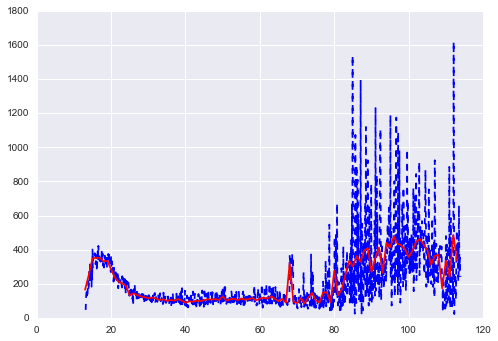

In [145]:
plt.plot(pf_by_age_with_month['age_with_months'], pf_by_age_with_month['mean'], 'b--') 
plt.plot(pf_by_age['age'], pf_by_age['mean'], 'r-') 
#plt.Axes.set_aspect(0.1)

#### Smoothing

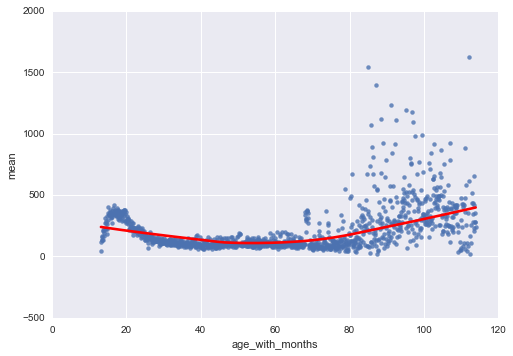

In [150]:
ax = sns.regplot(x='age_with_months', y='mean', data=pf_by_age_with_month,
                 lowess=True, line_kws={'color':'red'})